In [1]:
# Importing the necessary packages

import pandas as pd
import numpy as np

In [3]:
# Reading the dataset

ratings_Electronics_df = pd.read_csv('ratings_Electronics.csv')
ratings_Electronics_df.columns = ['userId', 'productId', 'ratings', 'timestamp']
ratings_Electronics_df.head()

,userId,productId,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
# As we don't need 'timestamp' column, we drop it.

ratings_Electronics_df = ratings_Electronics_df.drop(['timestamp'], axis = 1)

In [5]:
ratings_Electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [6]:
ratings_Electronics_df.shape

(7824481, 3)

In [7]:
# Evaluating whether there are any nan values or not

ratings_Electronics_df.isnull().values.any()

False

In [8]:
# Importing the necessary packages and enable plotting of graphs in Jupyter notebook

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028284667978>]],
      dtype=object)

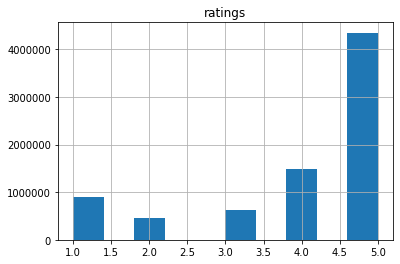

In [9]:
# Plotting the histogram for the 'ratings' column-

ratings_Electronics_df.hist(column='ratings')

In [10]:
# More than 4 lakh people have given very high ratings to the Electronics, i.e., most of them liked the electronics very much.
# Also, we can see that there is no average rating for the electronics around 2.5 rating.
# The people either liked the electronics or disliked the electronics.

In [11]:
# Taking a subset of the dataframe by keeping the users with 50 or more number of ratings
ratings_Electronics_df = ratings_Electronics_df[ratings_Electronics_df.groupby('userId')['userId'].transform('size') >= 50]

In [12]:
ratings_Electronics_df.shape

(125871, 3)

In [13]:
# Popularity Recommender model

In [14]:
#Importing the file having classes of popularity based model and item similarity based model

import Recommenders as Recommenders

In [15]:
product_grouped = ratings_Electronics_df.groupby(['productId']).agg({'ratings':'count'}).reset_index()

In [16]:
grouped_sum = product_grouped['ratings'].sum()

In [17]:
product_grouped['percentage'] = product_grouped['ratings'].div(grouped_sum)*100

In [18]:
# product_grouped.sort_values(['ratings', 'productId'], ascending = [0,1])

In [19]:
users = ratings_Electronics_df['userId'].unique()

In [20]:
# Splitting the data into train and test datasets

from sklearn.model_selection import train_test_split
train_data1, test_data1 = train_test_split(ratings_Electronics_df, test_size = 0.3, random_state = 55)

In [21]:
Popularity_model = Recommenders.popularity_recommender_py()

In [22]:
Popularity_model.create(train_data1, 'userId', 'productId')

In [23]:
# Recommending products to user 8th-

user_id = users[9]
Popularity_model.recommend(user_id)

,userId,productId,score,Rank
30819,A1A5KUIIIHFF4U,B0088CJT4U,154,1.0
19577,A1A5KUIIIHFF4U,B003ES5ZUU,131,2.0
30231,A1A5KUIIIHFF4U,B007WTAJTO,114,3.0
30524,A1A5KUIIIHFF4U,B00829TIEK,105,4.0
8668,A1A5KUIIIHFF4U,B000N99BBC,103,5.0
31074,A1A5KUIIIHFF4U,B008DWCRQW,95,6.0
17288,A1A5KUIIIHFF4U,B002R5AM7C,89,7.0
30520,A1A5KUIIIHFF4U,B00829THK0,88,8.0
22674,A1A5KUIIIHFF4U,B004CLYEDC,80,9.0
17456,A1A5KUIIIHFF4U,B002SZEOLG,77,10.0


In [24]:
# First 5 Recommended products for user 25th-

user_id = users[26]
Popularity_model.recommend(user_id).head()

,userId,productId,score,Rank
30819,A2JXS1JII6SAUD,B0088CJT4U,154,1.0
19577,A2JXS1JII6SAUD,B003ES5ZUU,131,2.0
30231,A2JXS1JII6SAUD,B007WTAJTO,114,3.0
30524,A2JXS1JII6SAUD,B00829TIEK,105,4.0
8668,A2JXS1JII6SAUD,B000N99BBC,103,5.0


In [ ]:
# Evaluating popularity based recommendation model-
# We cannot calculate RMSE in this type of model.
# This model is not at all user specific.
# It shows only the popular/trendy products.
# B0088CJT4U, B003ES5ZUU, B007WTAJTO, B00829TIEK, B000N99BBC are the top 5 product ID recommendations.

In [25]:
# Collaborative Filtering model

In [27]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [28]:
data = Dataset.load_from_df(ratings_Electronics_df[['userId', 'productId', 'ratings']], reader)

In [29]:
# Splitting the data into train and test datasets

from surprise.model_selection import train_test_split
trainset2, testset2 = train_test_split(data, test_size=.25,random_state = 55)

In [30]:
user_records = trainset2.ur

In [31]:
from surprise import KNNWithMeans
from surprise import accuracy

In [44]:
# Item based collaborative filtering

algo = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})
algo.fit(trainset2)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [45]:
# Evalute on test set
test_pred = algo.test(testset2)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.0577


1.0576776837266046

In [35]:
# convert results to dataframe
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]

In [36]:
test_pred_df.loc[test_pred_df.was_impossible].head(5)

,uid,iid,r_ui,est,details,was_impossible
0,A1CMD08Z49PGKQ,B00HQPTBYS,5.0,4.261845,"{'was_impossible': True, 'reason': 'User and/o...",True
1,A3INN916E4VION,B009ZDH4N4,5.0,4.261845,"{'was_impossible': True, 'reason': 'User and/o...",True
6,A1EKSETIBS9ETQ,B00FJDVSTA,4.0,4.261845,"{'was_impossible': True, 'reason': 'User and/o...",True
13,A1P0JSFW184ZXJ,B00G2KBMR2,4.0,4.261845,"{'was_impossible': True, 'reason': 'User and/o...",True
15,A1W415JP5WEAJK,B007136EDG,4.0,4.261845,"{'was_impossible': True, 'reason': 'User and/o...",True


In [37]:
testset_new = trainset2.build_anti_testset()

In [38]:
predictions = algo.test(testset_new[0:10000])

In [39]:
predictions_df = pd.DataFrame([[x.uid,x.est] for x in predictions])

In [40]:
predictions_df.columns = ["userId","est_rating"]
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [41]:
top_5_records = predictions_df.groupby("userId").head(5).reset_index(drop=True)
top_5_records

,userId,est_rating
0,A34BZM6S9L7QI4,5.0
1,A34BZM6S9L7QI4,5.0
2,A34BZM6S9L7QI4,5.0
3,A34BZM6S9L7QI4,5.0
4,A34BZM6S9L7QI4,5.0


In [ ]:
# Evaluating collaborative based recommendation model-
# We calculate RMSE in this type of model.
# This model is highly user specific.

In [0]:
# Summary
# The data was huge. Analysis was difficult. Visualization for data of individual users was not possible.
# We cannot calculate RMSE in popularity based recommendation model. And so, we can only predict the recommendations.
# In popularity based recommendation model, only trendy products are shown to every user, whereas, in collaborative models,
    # all users see different products. The data is highly user specific.

In [0]:
# Doubts-
# I couldn't understand why the value of RMSE is so high.
# How to check the predictions of each user in collaborative based model?